## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(study_results)

#mouse_metadata.head()

# Combine the data into a single dataset
mousemerge_df = mouse_metadata.merge(study_results, on='Mouse ID')
mousemerge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the DataFrame.
#study_results.index
print(mousemerge_df['Mouse ID'].nunique())

249


In [29]:
mouse_counts = mousemerge_df['Mouse ID'].value_counts()
mouse_counts

g989    13
k382    10
o287    10
c757    10
x581    10
        ..
d133     1
v199     1
t573     1
n482     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(mousemerge_df)['Mouse ID'].duplicates[0]
mousemerge_df[mousemerge_df.duplicated(['Mouse ID'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
mousemerge_df[mousemerge_df.duplicated() ==True].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop_df = mousemerge_df.drop_duplicates(subset=['Mouse ID'], keep=False)
mouse_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [93]:
# Checking the number of mice in the clean DataFrame.
print(mousemerge_df['Mouse ID'].nunique())
print(mouse_drop_df['Mouse ID'].nunique())

249
12


## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
  #tumor_volume = mousemerge_df(['Drug Regimen']).mean()
mouse_mean_df = mousemerge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median_df = mousemerge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_var_df = mousemerge_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std_df = mousemerge_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem_df = mousemerge_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_summary_df = pd.DataFrame({'Mean': mouse_mean_df, 
                                'Median': mouse_median_df,
                                'Variance': mouse_var_df,
                                'Standard Deviation': mouse_std_df,
                                'SEM': mouse_sem_df})
mouse_summary_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
summary_df = mousemerge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

<IPython.core.display.Javascript object>


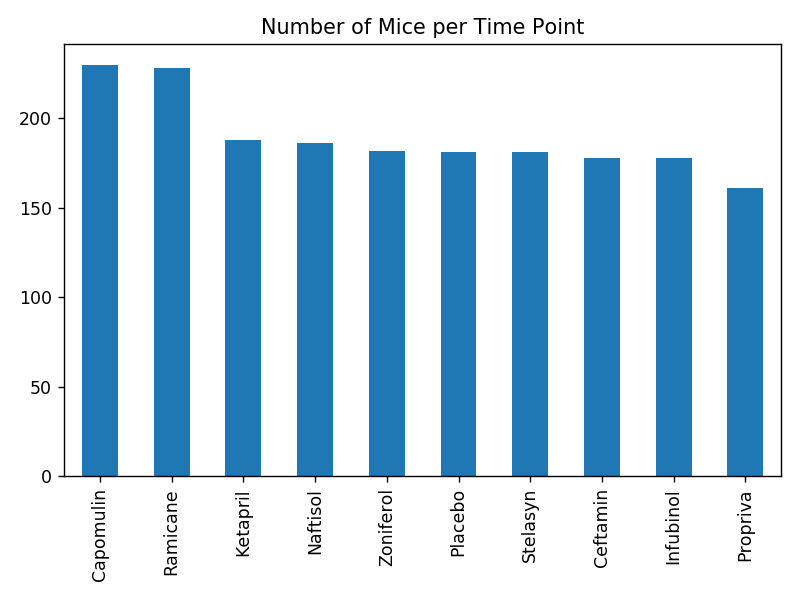

In [84]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.
drug_df = mousemerge_df['Drug Regimen'].value_counts()
drug_df.plot(kind='bar')
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Mice per Time Point')

plt.show()
plt.tight_layout()




<IPython.core.display.Javascript object>


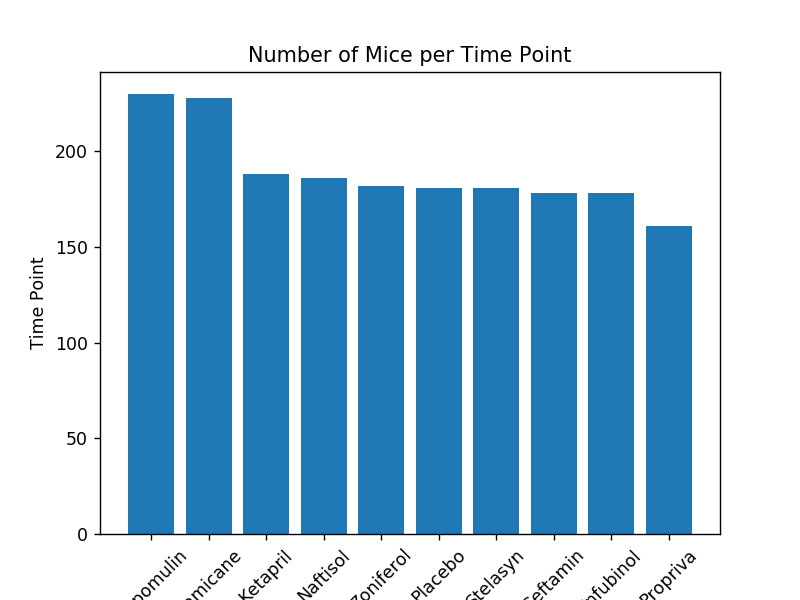

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

In [90]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
x_axis = drug_df.index.values
y_axis = drug_df.values

plt.title('Number of Mice per Time Point')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Point')

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis) 
plt.xticks(rotation=45)
#color='r', alpha=0.5, align="center")

## Pie Plots

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mgender = mousemerge_df.groupby('Mouse ID')['Sex'].count()
print(mgender)
p = pd.DataFrame(mousemerge_df.Sex(), columns=['Mouse ID', 'Sex'])
p['perc']= p['score']/p['score'].sum()

gender = ['Male', 'Female']
plt.pie(mgender, autopct="%1.1f%%", shadow=True, startangle=140)
#plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Sex, Length: 249, dtype: int64


TypeError: 'Series' object is not callable

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
